#  Exploratory Data Analysis for 2018 NBI dataset

The purpose of this notebook is to analyze the latest FHWA Bridge Inventory dataset for the state of Pennsylvania, which corresponds to the 2018 census of all the bridges in this state. This analysis will be developed for steel girder and concrete beam bridges, two of the most common deck typologies not only in USA but mainly in the world. 

We will explore the 2018 data and narrow the scope of this analysis by making some assumptions to focus on the topic we want to develop.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

### Import Bridge data

### OJO TAMBIEN HABRÍA QUE SUBIR LOS DATOS DE ELEVATIONS O DE PRECIPITACIONES SI METEMOS ESTADOS CON OTRO CLIMA

We are creating a dataframe from the zip file obtained from FHWA dataset for all the bridges in the US National Bridge Inventory (NBIs) on 2018.

In [4]:
total18 = pd.read_csv('./data/2018hwybronefiledel.zip',compression = 'zip',sep = ',',encoding='latin-1')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
total18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9,1999.0,2,0,50.0,2014.0,5,9.7,0,30,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,9.7,14.7,15.0,0.0,0.0,9.7,9.7,99.99,N,0.0,N,0.0,0.0,8,8,7,8,N,2,44.2,2,32.4,7,7,N,5.0,8,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,1,1.0,0,NaN,Y,8,59.0,2037.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9,2002.0,2,0,159.0,2017.0,5,6.5,0,0,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,1,0.0,0.0,1,0.0,9.7,12.9,13.6,0.3,0.3,9.1,9.8,99.99,N,0.0,N,0.0,0.0,8,8,7,7,N,2,84.2,2,34.8,7,6,N,5.0,7,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,8,1.0,0,NaN,Y,8,200.0,2034.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9,1942.0,2,0,375.0,2017.0,4,10.4,0,0,0,0,0,1,1,5.0,0,0.0,0.0,A,1,5,1,4,0.0,0.0,3,0.0,7.2,18.3,43.0,0.6,0.6,7.2,9.0,99.99,N,0.0,N,0.0,0.0,5,5,6,6,N,2,51.7,2,37.2,5,4,N,5.0,8,6.0,38.0,1.0,52.8,1017.0,24.0,N,Y60,N,NaN,1017.0,NaN,1.0,1.0,2.0,2017.0,NaN,NaN,NaN,0.0,N,2,NaN,

In [6]:
total18.shape

(616096, 137)

There are 616096 bridges in the NBIs dataset and 137 columns with variables.

#However, we will first reduce our dataset by focusing only in Pennsylvania, whose code in this dataset is 42.

### AQUI SE PUEDE MOSTRAR UNA VISUALIZACION PARA VER QUE EN PA ES DONDE MAS PUENTES DE VIGAS HAY Y POR ESO ELEGIMOS ESE ESTADO


In [7]:
list(total18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

In [14]:
total18.dtypes

STATE_CODE_001              int64
STRUCTURE_NUMBER_008       object
RECORD_TYPE_005A            int64
ROUTE_PREFIX_005B         float64
SERVICE_LEVEL_005C        float64
ROUTE_NUMBER_005D          object
DIRECTION_005E            float64
HIGHWAY_DISTRICT_002       object
COUNTY_CODE_003           float64
PLACE_CODE_004            float64
FEATURES_DESC_006A         object
CRITICAL_FACILITY_006B    float64
FACILITY_CARRIED_007       object
LOCATION_009               object
MIN_VERT_CLR_010          float64
KILOPOINT_011             float64
BASE_HWY_NETWORK_012      float64
LRS_INV_ROUTE_013A         object
SUBROUTE_NO_013B          float64
LAT_016                   float64
LONG_017                  float64
DETOUR_KILOS_019            int64
TOLL_020                    int64
MAINTENANCE_021             int64
OWNER_022                   int64
FUNCTIONAL_CLASS_026        int64
YEAR_BUILT_027            float64
TRAFFIC_LANES_ON_028A       int64
TRAFFIC_LANES_UND_028B      int64
ADT_029       

In [7]:
#pastate = [42]
#mystates = [42,39]
#pa18 = total18[total18['STATE_CODE_001'].isin(pastate)]

In [9]:
#pa18.shape

(22737, 137)

In [10]:
# Let's save this dataframe as a csv file since this will be the dataframe we will be performing our EDA on.
#pa18.to_csv (r'./pa18.csv', index = None, header=True)

## EJECUTAR A PARTIR DE AQUI CUANDO RETOME ESTE NOTEBOOK

In [4]:
#pa18 = pd.read_csv('pa18.csv')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,17,75,98,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clear and Merge Data

We will perform several filters in order to clear our data and get some useful insights. 
The filters will be developed from generic to more specific features.

We will also need to add columns and transform some variables.

Our filters and merge operations will be: 

    

    1) Selecting only bridges: the FHWA inventory includes data on both bridges and culverts.

    2) Limit the dataset to bridges built after 1900: bridges built before ASTM standards (founded in 1898) would have had inconsistent standards for material acceptance in the bridge.
    
    3) Selecting only the columns we will be interested in.

    4) Filtering only the bridges with steel girders and prestressed concrete decks.
    
    5) Group categories in some of the categorical variables

    


In [96]:
#pa18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
1,42,000000000000001,1,3.0,1.0,00000,0.0,8,1.0,27704.0,'US 15; SR 0015 ',NaN,'BOYLE RD; T-313 ','N OF MARYLAND LINE ',99.99,0.000,0.0,NaN,NaN,39432979.0,77181454.0,13,3,1,1,19,1963.0,2,8,852.0,2017.0,5,8.5,0,9,0,0,0,1,1,5.0,N,0.0,0.0,A,1,1,5,2,0.0,0.0,2,0.0,8.5,20.1,40.2,0.5,0.5,8.5,10.2,99.99,H,4.5,H,99.9,99.9,8,7,7,N,N,1,87.1,1,28.1,7,5,3,5.0,N,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,N,2,NaN,0,0,0.0,1,3,0,0,8.0,0,NaN,Y,N,983.0,2032.0,0.0,N,5/31/2018,B,A,NaN,L1C0,X081315,0.0,14.0,14.0,NaN,NaN,2,NaN,83.0,2,G,7,410.04
2,42,000000000000002,1,2.0,1.0,00015,1.0,8,1.0,27704.0,'MIDDLE CREEK ',NaN,'US 15 NB; SR 0015 ','1.25M N. MARYLAND LINE ',99.99,1.918,1.0,10015,0.0,39440820.0,77175007.0,13,3,1,1,2,1990.0,2,0,9057.0,2016.0,9,12.2,1,6,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,2,0.0,0.0,1,0.0,12.2,29.9,31.4,0.2,0.2,12.2,13.0,99.99,N,0.0,N,0.0,0.0,7,7,7,8,N,1,90.7,1,47.2,7,7,N,5.0,9,8.0,NaN,NaN,0.0,916.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,2.0,R,1,NaN,1,0,0.0,1,1,0,1,16.0,0,NaN,Y,8,10417.0,2032.0,0.0,N,5/31/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,92.5,0,G,7,408.20
3,42,000000000000003,1,2.0,1.0,00015,3.0,8,1.0,27704.0,'MIDDLE CREEK ',NaN,'US 15 SB; SR 0015 ','1.25 MI.N. OF MD.LINE ',99.99,1.936,1.0,10015,0.0,39440881.0,77175080.0,13,3,1,1,2,1963.0,2,0,9092.0,2016.0,5,12.2,1,6,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,6,0.0,0.0,2,0.0,12.8,14.6,30.8,0.2,0.2,12.8,13.9,99.99,N,0.0,N,0.0,0.0,6,6,6,6,N,1,88.9,1,39.0,6,8,N,5.0,9,8.0,NaN,NaN,0.0,916.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,2.0,L,1,NaN,1,0,19

In [36]:
list(total18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

In [5]:
#The culverts will be dropped out of our dataset

total18 = total18.loc[total18['CULVERT_COND_062'] == 'N']

In [6]:
total18.shape

(475464, 137)

In [7]:
#Drop bridges built before 1900 due to material standards

total18 = total18.loc[total18['YEAR_BUILT_027'] > 1900]

In [8]:
total18.shape

(470511, 137)

In [9]:
# Drop impossible data like year of reconstruction after current year (2018) 

total18['YEAR_RECONSTRUCTED_106'].fillna(0, inplace = True)
total18 = total18[total18['YEAR_RECONSTRUCTED_106'] < 2018]

In [10]:
total18.shape

(470429, 137)

In [11]:
# Let's select only the columns we will work with

descriptive_cols = ['STATE_CODE_001',
                    'STRUCTURE_NUMBER_008',
                   'LAT_016',
                   'LONG_017']

geometric_cols = ['TRAFFIC_LANES_ON_028A',
                  'MEDIAN_CODE_033',
                  'DEGREES_SKEW_034',
                  'STRUCTURE_KIND_043A',
                  'STRUCTURE_TYPE_043B',
                  'MAIN_UNIT_SPANS_045',
                  'MAX_SPAN_LEN_MT_048',
                  'STRUCTURE_LEN_MT_049',
                  'DECK_WIDTH_MT_052',
                  'SURFACE_TYPE_108A']

functional_cols = ['YEAR_BUILT_027',
                   'ADT_029',
                   'DESIGN_LOAD_031',
                   'PERCENT_ADT_TRUCK_109']

operational_cols = ['MAINTENANCE_021',
                    'FUNCTIONAL_CLASS_026',
                    'WATERWAY_EVAL_071',
                    'YEAR_RECONSTRUCTED_106']

rating_cols = ['DECK_COND_058',
               'SUPERSTRUCTURE_COND_059',
               'SUBSTRUCTURE_COND_060']

In [12]:
cols_interest = descriptive_cols+geometric_cols+functional_cols+operational_cols+rating_cols
cols_interest

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'LAT_016',
 'LONG_017',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'ADT_029',
 'DESIGN_LOAD_031',
 'PERCENT_ADT_TRUCK_109',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'YEAR_RECONSTRUCTED_106',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

In [13]:
# Let's reduce the dataset to those columns
total18_fil = total18[cols_interest]

In [62]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,PERCENT_ADT_TRUCK_109,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,1,00000000000S702,31061110.0,87341340.0,2,0,30,5,5,1,14.7,15.0,9.7,6,1999.0,50.0,5,1.0,62,9,8,0.0,8,8,7
1,1,00000000000S703,31062020.0,87340890.0,2,0,0,5,1,1,12.9,13.6,9.8,6,2002.0,159.0,5,1.0,62,9,7,0.0,8,8,7
2,1,0000000000M0022,32174328.0,84583800.0,2,0,0,1,4,3,18.3,43.0,9.0,1,1942.0,375.0,4,35.0,74,9,8,0.0,5,5,6
3,1,000000883039900,34270600.0,87581200.0,2,0,99,5,5,5,14.0,65.5,10.5,0,1974.0,300.0,5,5.0,67,8,9,0.0,7,7,7
4,1,000001014002450,34481800.0,87225400.0,2,0,0,3,10,2,53.3,1981.2,7.8,0,1937.0,6200.0,4,10.0,67,6,8,1962.0,5,6,5


In [14]:
total18_fil.shape

(470429, 25)

In [15]:
total18_fil.dtypes

STATE_CODE_001               int64
STRUCTURE_NUMBER_008        object
LAT_016                    float64
LONG_017                   float64
TRAFFIC_LANES_ON_028A        int64
MEDIAN_CODE_033              int64
DEGREES_SKEW_034             int64
STRUCTURE_KIND_043A          int64
STRUCTURE_TYPE_043B          int64
MAIN_UNIT_SPANS_045          int64
MAX_SPAN_LEN_MT_048        float64
STRUCTURE_LEN_MT_049       float64
DECK_WIDTH_MT_052          float64
SURFACE_TYPE_108A           object
YEAR_BUILT_027             float64
ADT_029                    float64
DESIGN_LOAD_031             object
PERCENT_ADT_TRUCK_109      float64
MAINTENANCE_021              int64
FUNCTIONAL_CLASS_026         int64
WATERWAY_EVAL_071           object
YEAR_RECONSTRUCTED_106     float64
DECK_COND_058               object
SUPERSTRUCTURE_COND_059     object
SUBSTRUCTURE_COND_060       object
dtype: object

In [16]:
object_cols = ['SURFACE_TYPE_108A','DESIGN_LOAD_031','WATERWAY_EVAL_071','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']

In [17]:
# Convert the columns with no type to numeric values
for col in object_cols:
    total18_fil[col] = pd.to_numeric(total18_fil[col], errors='coerce')
    total18_fil[col] = total18_fil[col].astype('float64')
    

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## VER SI SE PUEDE QUITAR ESTE WARNING CON EL .LOC
## VER EL FILTER DE LAS CULVERTS QUE SI LO TIENE

In [27]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,PERCENT_ADT_TRUCK_109,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,1,00000000000S702,31061110.0,87341340.0,2,0,30,5,5,1,14.7,15.0,9.7,6.0,1999.0,50.0,5.0,1.0,62,9,8.0,0.0,8.0,8.0,7.0
1,1,00000000000S703,31062020.0,87340890.0,2,0,0,5,1,1,12.9,13.6,9.8,6.0,2002.0,159.0,5.0,1.0,62,9,7.0,0.0,8.0,8.0,7.0
2,1,0000000000M0022,32174328.0,84583800.0,2,0,0,1,4,3,18.3,43.0,9.0,1.0,1942.0,375.0,4.0,35.0,74,9,8.0,0.0,5.0,5.0,6.0
3,1,000000883039900,34270600.0,87581200.0,2,0,99,5,5,5,14.0,65.5,10.5,0.0,1974.0,300.0,5.0,5.0,67,8,9.0,0.0,7.0,7.0,7.0
4,1,000001014002450,34481800.0,87225400.0,2,0,0,3,10,2,53.3,1981.2,7.8,0.0,1937.0,6200.0,4.0,10.0,67,6,8.0,1962.0,5.0,6.0,5.0


In [28]:
# We only want the bridges with steel girders and prestressed concrete beams

total18_fil['STRUCTURE_KIND_043A'].unique()

array([5, 1, 3, 4, 2, 6, 7, 8, 0, 9])

In [29]:
# We only want beams or girders superstructures
total18_fil['STRUCTURE_TYPE_043B'].unique()

array([ 5,  1,  4, 10,  3, 22,  2, 12, 11,  7,  9,  0,  6, 21, 15, 14,  8,
       13, 17, 16, 20])

In [18]:
# The item codification is as follows: 
# 3 for steel, 4 for steel continuous, 5 for pre-stressed concrete and 6 for pre-stressed concrete continuous

total18_fil = total18_fil[(total18_fil['STRUCTURE_KIND_043A'].isin([3,4,5,6]))]

In [66]:
total18_fil.shape

(318948, 25)

In [19]:
# The item codification is 2 for stringer/multi-beam or girder

total18_fil = total18_fil[(total18_fil['STRUCTURE_TYPE_043B']==2)]

In [68]:
total18_fil.shape

(219312, 25)

In [106]:
# Grouping categories in some variables

In [20]:
# Median on bridge - ITEM 33
code_median = {0:0,1:1,2:2,3:2}
total18_fil['MEDIAN_CODE_033'] = total18_fil['MEDIAN_CODE_033'].map(code_median)

In [21]:
# Structure Type - ITEM 43A
code_struc = {3:'steel',4:'steel',5:'concrete',6:'concrete'}
total18_fil['STRUCTURE_KIND_043A'] = total18_fil['STRUCTURE_KIND_043A'].map(code_struc)

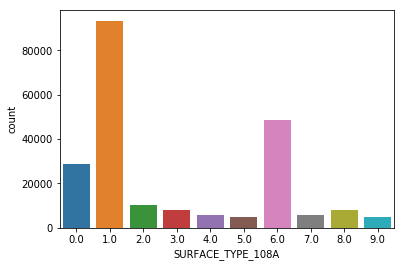

In [71]:
# Wearing surface - ITEM 108
sns.countplot(total18_fil['SURFACE_TYPE_108A'])

In [22]:
code_ws = {1:'concrete',2:'concrete',3:'concrete',4:'concrete',
          6:'bituminous', 0:'none'}

total18_fil['SURFACE_TYPE_108A'] = total18_fil['SURFACE_TYPE_108A'].map(code_ws)

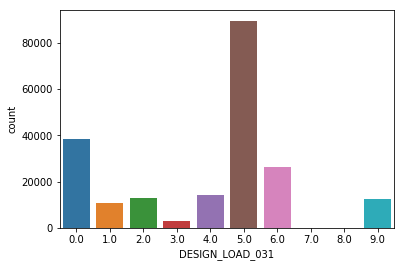

In [73]:
# Design Load - ITEM 31
sns.countplot(total18_fil['DESIGN_LOAD_031'])

In [23]:
code_truck = {0:'other',7:'other',8:'other',
              1:'light',2:'light',3:'light',4:'light',
              5:'heavy',6:'heavy',9:'heavy'}

total18_fil['DESIGN_LOAD_031'] = total18_fil['DESIGN_LOAD_031'].map(code_truck)

In [24]:
# Maintenanace Responsability - ITEM 21
code_resp = {1:1,2:2,3:3,4:4}
total18_fil['MAINTENANCE_021'] = total18_fil['MAINTENANCE_021'].map(code_resp)
total18_fil['MAINTENANCE_021'].fillna(5, inplace = True)

In [25]:
# Functional Classification - ITEM 26
code_class = {1:'rural',2:'rural',6:'rural',7:'rural',8:'rural',9:'rural',
              11:'urban',12:'urban',14:'urban',16:'urban',17:'urban',19:'urban'}
total18_fil['FUNCTIONAL_CLASS_026'] = total18_fil['FUNCTIONAL_CLASS_026'].map(code_class)

In [26]:
# Waterway - ITEM 71
code_water = {9:'low',8:'low',
              7:'high',6:'high',5:'high',4:'high',3:'high',2:'high',
              np.nan:'none'}

total18_fil['WATERWAY_EVAL_071'] = total18_fil['WATERWAY_EVAL_071'].map(code_water)

In [27]:
# Finally the dataset we have obtained is as follows
total18_fil.shape

(219312, 25)

In [28]:
total18_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219312 entries, 17 to 616084
Data columns (total 25 columns):
STATE_CODE_001             219312 non-null int64
STRUCTURE_NUMBER_008       219312 non-null object
LAT_016                    219310 non-null float64
LONG_017                   219310 non-null float64
TRAFFIC_LANES_ON_028A      219312 non-null int64
MEDIAN_CODE_033            219312 non-null int64
DEGREES_SKEW_034           219312 non-null int64
STRUCTURE_KIND_043A        219312 non-null object
STRUCTURE_TYPE_043B        219312 non-null int64
MAIN_UNIT_SPANS_045        219312 non-null int64
MAX_SPAN_LEN_MT_048        219312 non-null float64
STRUCTURE_LEN_MT_049       219312 non-null float64
DECK_WIDTH_MT_052          219312 non-null float64
SURFACE_TYPE_108A          195001 non-null object
YEAR_BUILT_027             219312 non-null float64
ADT_029                    219312 non-null float64
DESIGN_LOAD_031            207177 non-null object
PERCENT_ADT_TRUCK_109      207068 non

In [29]:
# Drop null values
total18_fil.dropna(inplace = True)

In [30]:
total18_fil.shape

(175597, 25)

In [31]:
categorical_cols = [ 'MEDIAN_CODE_033',
 'STRUCTURE_KIND_043A',
 'SURFACE_TYPE_108A',
 'DESIGN_LOAD_031',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

for col in categorical_cols:
    values = total18_fil[col].unique()
    print("The values of %s column are: %s" %(col, values))

The values of MEDIAN_CODE_033 column are: [0 2 1]
The values of STRUCTURE_KIND_043A column are: ['steel' 'concrete']
The values of SURFACE_TYPE_108A column are: ['bituminous' 'concrete' 'none']
The values of DESIGN_LOAD_031 column are: ['heavy' 'other' 'light']
The values of MAINTENANCE_021 column are: [5. 4. 2. 1. 3.]
The values of FUNCTIONAL_CLASS_026 column are: ['urban' 'rural']
The values of WATERWAY_EVAL_071 column are: ['none' 'high' 'low']
The values of DECK_COND_058 column are: [6. 4. 7. 8. 5. 3. 9. 2. 0. 1.]
The values of SUPERSTRUCTURE_COND_059 column are: [7. 4. 6. 5. 3. 2. 8. 9. 0. 1.]
The values of SUBSTRUCTURE_COND_060 column are: [7. 4. 5. 6. 2. 3. 8. 9. 1. 0.]


In [32]:
# Since we are looking for joining all the datasets with this one by using the Structure number, we should first check that there are no duplicates on it
total18_fil['STRUCTURE_NUMBER_008'].duplicated().value_counts()

False    168029
True       7568
Name: STRUCTURE_NUMBER_008, dtype: int64

In [51]:
dupl_rows = total18_fil[total18_fil.duplicated(['STRUCTURE_NUMBER_008'])]
dupl_rows.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,PERCENT_ADT_TRUCK_109,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
22989,4,7596,33341889.0,112055871.0,6,0,10,concrete,2,1,19.5,20.7,26.3,concrete,1988.0,41200.0,heavy,1.0,4.0,urban,low,0.0,7.0,7.0,7.0
22992,4,7599,33392236.0,111583868.0,6,0,21,concrete,2,1,27.1,27.7,25.5,concrete,1978.0,30152.0,heavy,5.0,4.0,urban,low,0.0,6.0,7.0,7.0
23011,4,7630,32080210.0,110593544.0,3,0,4,concrete,2,3,31.7,96.0,17.7,concrete,1989.0,23500.0,heavy,10.0,4.0,urban,high,1996.0,7.0,7.0,7.0
23289,4,7960,33260652.0,112000059.0,2,0,0,concrete,2,16,27.4,411.2,19.1,concrete,1991.0,9329.0,heavy,10.0,4.0,urban,none,0.0,7.0,7.0,7.0
23301,4,7976,33260645.0,112000845.0,1,0,0,concrete,2,8,27.4,192.0,5.5,concrete,1991.0,7967.0,heavy,10.0,4.0,urban,none,0.0,7.0,7.0,7.0


In [41]:
state_name = {25:'MASSACHUSETTS',
             4:'ARIZONA', 
             8:'COLORADO',
             38:'NORTH DAKOTA', 
             9:'CONNECTICUT', 
             19:'IOWA', 
             26:'MICHIGAN', 
             48:'TEXAS',
             35:'NEW MEXICO',
             17:'ILLINOIS', 
             51:'VIRGINIA',
             23:'MAINE',
             16:'IDAHO',
             36:'NEW YORK',
             56:'WYOMING',
             29:'MISSOURI',
             39:'OHIO',
             28:'MISSISSIPI', 
             11:'DISTRICT OF COLOMBIA',
             21:'KENTUCKY', 
             18:'INDIANA',
             6:'CALIFORNIA',
             47:'TENNESSEE', 
             12:'FLORIDA',
             24:'MARYLAND',
             34:'NEW JERSEY', 
             46:'SOUTH DAKOTA',
             13:'GEORGIA',
             55:'WISCONSIN',
             30:'MONTANA',
             54:'WEST VIGINIA',
             15:'HAWAII', 
             32:'NEVADA', 
             37:'NORTH CAROLINA',
             10:'DELAWARE', 
             33:'NEW HAMPSHIRE', 
             44:'RHODE ISLAND',
             50:'VERMONT', 
             42:'PENNSYLVANIA', 
             5:'ARKANSAS', 
             20:'KANSAS', 
             45:'SOUTH CAROLINA',
             22:'LOUISIANA',
             40:'OKLAHOMA', 
             72:'PUERTO RICO', 
             41:'OREGON',
             21:'MINNESOTA', 
             53:'WASHINGTON', 
             1:'ALABAMA', 
             31:'NEBRASKA',
             2:'ALASKA', 
             49:'UTAH'
               }

In [43]:
dupl_rows['STATE_NAME'] =  dupl_rows['STATE_CODE_001'].map(state_name)
dupl_rows['STATE_NAME'].value_counts()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


VIRGINIA          2127
PENNSYLVANIA      1742
SOUTH CAROLINA    1275
MISSOURI           772
IOWA               419
MICHIGAN           408
NORTH CAROLINA     251
RHODE ISLAND       152
INDIANA            125
NEW MEXICO         120
ARKANSAS            57
MAINE               26
ARIZONA             22
IDAHO               14
OHIO                12
NEW YORK            10
KANSAS               6
OKLAHOMA             4
NEW JERSEY           3
PUERTO RICO          3
SOUTH DAKOTA         2
TEXAS                1
Name: STATE_NAME, dtype: int64

In [70]:
(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008']

STATE_CODE_001
4      1.774194
5      1.631835
16     1.516793
18     2.516610
19     5.909732
20     0.214746
23     2.722513
26    11.457456
27     1.169188
29     6.917563
34     0.092081
35    11.846002
36     0.129032
37     3.084296
39     0.161573
40     0.047427
42    30.723104
44    39.074550
45    47.986451
46     0.279720
48     0.005714
51    38.616558
72     0.261780
Name: STRUCTURE_NUMBER_008, dtype: float64

In [66]:
# Before dropping all the duplicated values, let's calculate the percentage of data lost
(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008'].describe()

count    23.000000
mean      9.049518
std      14.722389
min       0.005714
25%       0.238263
50%       1.774194
75%       9.187509
max      47.986451
Name: STRUCTURE_NUMBER_008, dtype: float64

In South Carolina almost half of the bridges were duplicated (48%). We are also loosing a big part of the data in Pennsylvania and Rhode Island.

However, the median of loss is less than 2% of the bridges, so will drop the duplicated values.

In [74]:
# Drop duplicates

total18_fil.drop_duplicates(subset='STRUCTURE_NUMBER_008', inplace = True)

In [75]:
total18_fil.shape

(168029, 25)

In [76]:
# Save to csv

total18_fil.to_csv (r'./total18_fil.csv', index = None, header=True)